Fédération Internationale de Football Association(FIFA ) publishes Player rating data set which contains over 85 features about 18000 players. The feaures and players are updated annually and players are rated from 1(worst) to 100(best) . The data set can be used for various purposes, one of which is in the gaming industry.

The goal of this study is to explore the 2019 publication of this dataset using statistical and programatic techniques.

In [1]:
from __future__ import print_function, division


import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

import numpy as np

import pandas as pd
import thinkstats2
import thinkplot
import os

In [ ]:
Data Preparation

In [2]:
# Use style sheet from matplotlib
plt.style.use('fivethirtyeight')

In [4]:
data = pd.read_csv("Data/fifa19_data.csv")
#data = df_main.sample(frac=.25)

data.shape

(18207, 89)

In [5]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
skills =["Crossing","Finishing","HeadingAccuracy","ShortPassing","Volleys","Dribbling","Curve","FKAccuracy","LongPassing","BallControl","Acceleration","SprintSpeed","Agility","Reactions","Balance","ShotPower","Jumping","Stamina","Strength","LongShots","Aggression","Interceptions","Positioning","Vision","Penalties","Composure","Marking","StandingTackle","SlidingTackle","GKDiving","GKHandling","GKKicking","GKPositioning","GKReflexes"]
data[skills]


,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [8]:
# checking if the data contains any NULL value

data.isnull()[skills].sum()

Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
dtype: int64

In [9]:
# replacing missing data in the skills features with the mean of those with valid values.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(data[skills])
data[skills] = imputer.transform(data[skills])

In [10]:
data.isnull()[skills].sum()

Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

In [11]:
data.isnull()[['Weight','Height']].sum()

Weight    48
Height    48
dtype: int64

In [12]:
# Replace missing values for weight and height to 9999lbs and 833'3 respectively.
# Once converted in convert_height function below, the height value of 833'3 will convert to 9999
# The 9999's in both weight and height columns will then be replaced with the mean value of their respective columns
data['Weight'].fillna('9999lbs', inplace = True)
data['Height'].fillna("833'3", inplace = True)

In [13]:
data[data['Height'] == "833'3"]['Height']

13236    833'3
13237    833'3
13238    833'3
13239    833'3
13240    833'3
13241    833'3
13242    833'3
13243    833'3
13244    833'3
13245    833'3
13246    833'3
13247    833'3
13248    833'3
13249    833'3
13250    833'3
13251    833'3
13252    833'3
13253    833'3
13254    833'3
13255    833'3
13256    833'3
13257    833'3
13258    833'3
13259    833'3
13260    833'3
13261    833'3
13262    833'3
13263    833'3
13264    833'3
13265    833'3
13266    833'3
13267    833'3
13268    833'3
13269    833'3
13270    833'3
13271    833'3
13272    833'3
13273    833'3
13274    833'3
13275    833'3
13276    833'3
13277    833'3
13278    833'3
13279    833'3
13280    833'3
13281    833'3
13282    833'3
13283    833'3
Name: Height, dtype: object

In [14]:
#remove 'lbs' from weight value
data[data['Weight'] == "9999lbs"]['Weight']

13236    9999lbs
13237    9999lbs
13238    9999lbs
13239    9999lbs
13240    9999lbs
13241    9999lbs
13242    9999lbs
13243    9999lbs
13244    9999lbs
13245    9999lbs
13246    9999lbs
13247    9999lbs
13248    9999lbs
13249    9999lbs
13250    9999lbs
13251    9999lbs
13252    9999lbs
13253    9999lbs
13254    9999lbs
13255    9999lbs
13256    9999lbs
13257    9999lbs
13258    9999lbs
13259    9999lbs
13260    9999lbs
13261    9999lbs
13262    9999lbs
13263    9999lbs
13264    9999lbs
13265    9999lbs
13266    9999lbs
13267    9999lbs
13268    9999lbs
13269    9999lbs
13270    9999lbs
13271    9999lbs
13272    9999lbs
13273    9999lbs
13274    9999lbs
13275    9999lbs
13276    9999lbs
13277    9999lbs
13278    9999lbs
13279    9999lbs
13280    9999lbs
13281    9999lbs
13282    9999lbs
13283    9999lbs
Name: Weight, dtype: object

In [15]:
def convert_weight(value):
    weight = value.replace('lbs', '')
    return int(weight)

In [16]:
# remove 'lbs' from the weight value and convert to integer
data['Weight'] = data['Weight'].apply(lambda x : convert_weight(x))

In [17]:
data[data['Weight'] == 9999]['Weight']

13236    9999
13237    9999
13238    9999
13239    9999
13240    9999
13241    9999
13242    9999
13243    9999
13244    9999
13245    9999
13246    9999
13247    9999
13248    9999
13249    9999
13250    9999
13251    9999
13252    9999
13253    9999
13254    9999
13255    9999
13256    9999
13257    9999
13258    9999
13259    9999
13260    9999
13261    9999
13262    9999
13263    9999
13264    9999
13265    9999
13266    9999
13267    9999
13268    9999
13269    9999
13270    9999
13271    9999
13272    9999
13273    9999
13274    9999
13275    9999
13276    9999
13277    9999
13278    9999
13279    9999
13280    9999
13281    9999
13282    9999
13283    9999
Name: Weight, dtype: int64

In [18]:
def convert_height(value):
    height = int(value.split("'")[0])*12 + int(value.split("'")[1])
    return int(height)


In [19]:
# Convert Height from "ft'inch" string format to inches in integer(Note the 833'3 will convert to 999 
# which will then be replaced with mean height
data['Height_Inch'] = data['Height'].apply(lambda x : convert_height(x))
data[['Height_Inch','Height']].head(50)

,Height_Inch,Height
0,67,5'7
1,74,6'2
2,69,5'9
3,76,6'4
4,71,5'11
5,68,5'8
6,68,5'8
7,72,6'0
8,72,6'0
9,74,6'2


In [20]:
# Replace missing data in the 'Weight'and'Height' features with the mean of those with valid values.
imputer = SimpleImputer(missing_values = 9999, strategy = 'mean')
imputer = imputer.fit(data[['Weight','Height_Inch']])
data[['Weight','Height_Inch']] = imputer.transform(data[['Weight','Height_Inch']])

In [21]:
def convert_to_ft_in(value,param):
    ft = int(param//12)
    inch = int(param%12)
    ft_inch = str(ft) + "'" + str(inch)
    if value == "833'3":
        value = ft_inch
    return(value)

In [22]:
# Replace 833'3 with mean value of height_Int in ft'inch format
import statistics 
mean_height = statistics.mean(data['Height_Inch'])
data['Height'] = data['Height'].apply(lambda x : convert_to_ft_in(x,mean_height))

In [23]:
data[data['Height'] == "833'3"]['Height'] # 833'3 are gone

Series([], Name: Height, dtype: object)

In [24]:
data[data['Height_Inch'] == 9999]['Height_Inch'] # 9999's are gone

Series([], Name: Height_Inch, dtype: float64)

In [25]:
data[data['Weight'] == 9999]['Weight'] # 9999's are gone

Series([], Name: Weight, dtype: float64)

In [26]:
def convert_to_years(value):
    years = datetime(2019, 12, 31).year - value.year
    return(years)

In [595]:
# Create years of experience from the time player joined

In [27]:
from datetime import datetime
data['Joined']= pd.to_datetime(data['Joined']) 
data['Experience'] = data['Joined'].apply(lambda x : convert_to_years(x))

In [28]:
# Replace missing data in Experience with the mean of those with valid values.
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(data[['Experience']])
data[['Experience']] = imputer.transform(data[['Experience']])

In [29]:
data["MeanSkills"] =data.loc[:,skills].mean(axis=1)

In [30]:
data[['Name','Joined','Experience','MeanSkills']].head(50)

,Name,Joined,Experience,MeanSkills
0,L. Messi,2004-07-01,15.000000,67.588235
1,Cristiano Ronaldo,2018-07-10,1.000000,68.323529
2,Neymar Jr,2017-08-03,2.000000,65.794118
3,De Gea,2011-07-01,8.000000,45.264706
4,K. De Bruyne,2015-08-30,4.000000,69.676471
5,E. Hazard,2012-07-01,7.000000,65.676471
6,L. Modrić,2012-08-01,7.000000,69.529412
7,L. Suárez,2014-07-11,5.000000,71.500000
8,Sergio Ramos,2005-08-01,14.000000,67.147059
9,J. Oblak,2014-07-16,5.000000,41.205882


Explore Data

In [31]:
#Number of countries available and top 10 countries with highest number of players
print('Total number of countries : {0}'.format(data['Nationality'].nunique()))
print(data['Nationality'].value_counts().head(10))

#European Countries have most players

Total number of countries : 164
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64


In [32]:
# Best in each skill category
for skill in skills:
    print('Best {0} : {1} from {2}'.format(skill,data.loc[data[skill].idxmax()]['Name'],data.loc[data[skill].idxmax()]['Nationality']))

Best Crossing : K. De Bruyne from Belgium
Best Finishing : L. Messi from Argentina
Best HeadingAccuracy : Naldo from Brazil
Best ShortPassing : L. Modrić from Croatia
Best Volleys : E. Cavani from Uruguay
Best Dribbling : L. Messi from Argentina
Best Curve : Quaresma from Portugal
Best FKAccuracy : L. Messi from Argentina
Best LongPassing : T. Kroos from Germany
Best BallControl : L. Messi from Argentina
Best Acceleration : Douglas Costa from Brazil
Best SprintSpeed : K. Mbappé from France
Best Agility : Neymar Jr from Brazil
Best Reactions : Cristiano Ronaldo from Portugal
Best Balance : Bernard from Brazil
Best ShotPower : Cristiano Ronaldo from Portugal
Best Jumping : Cristiano Ronaldo from Portugal
Best Stamina : N. Kanté from France
Best Strength : A. Akinfenwa from England
Best LongShots : L. Messi from Argentina
Best Aggression : B. Pearson from England
Best Interceptions : N. Kanté from France
Best Positioning : Cristiano Ronaldo from Portugal
Best Vision : L. Messi from Argent

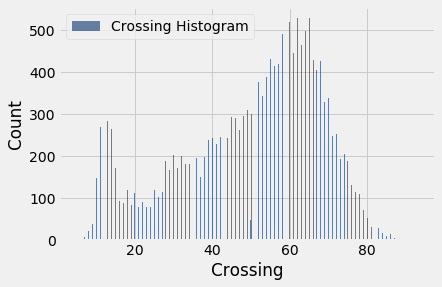

In [35]:
# Histogram of Crossing
crossing_hist = thinkstats2.Hist(data['Crossing'], label='Crossing Histogram')
thinkplot.Hist(crossing_hist)
thinkplot.Config(xlabel='Crossing', ylabel='Count')

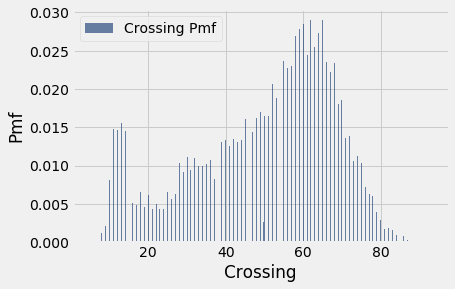

In [36]:
# PMF of crossing
crossing_pmf = thinkstats2.Pmf(data['Crossing'], label='Crossing Pmf')
thinkplot.Hist(crossing_pmf)
thinkplot.Config(xlabel='Crossing', ylabel='Pmf')

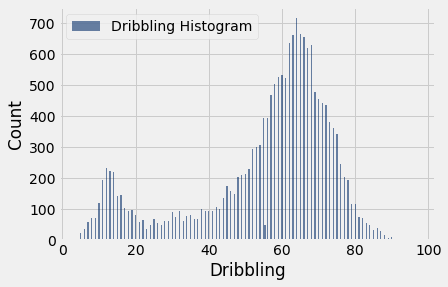

In [38]:
# Histogram of Dribbling
dribbling_hist = thinkstats2.Hist(data['Dribbling'],label='Dribbling Histogram')
thinkplot.Hist(dribbling_hist)
thinkplot.Config(xlabel='Dribbling', ylabel='Count')

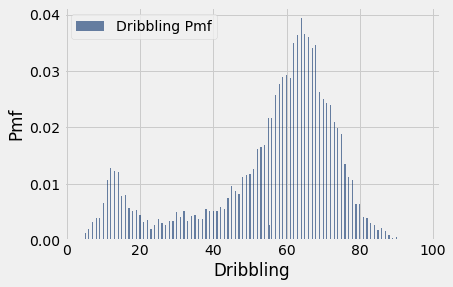

In [39]:
# PMF of Dribbling
dribbling_pmf = thinkstats2.Pmf(data['Dribbling'], label='Dribbling Pmf')
thinkplot.Hist(dribbling_pmf)
thinkplot.Config(xlabel='Dribbling', ylabel='Pmf')

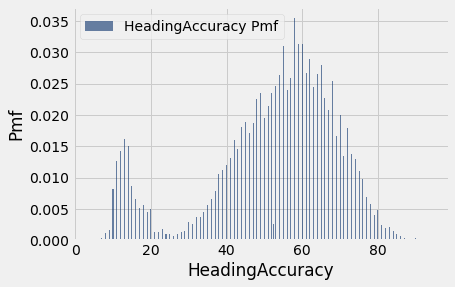

In [41]:
# PMF of HeadingAccuracy
HeadingAccuracy_pmf = thinkstats2.Pmf(data['HeadingAccuracy'], label='HeadingAccuracy Pmf')
thinkplot.Hist(HeadingAccuracy_pmf)
thinkplot.Config(xlabel='HeadingAccuracy', ylabel='Pmf')

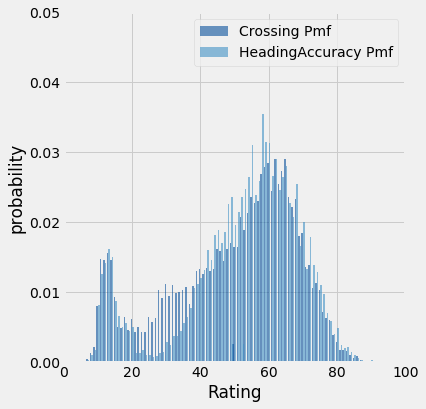

In [42]:
width=0.45
axis = [0,100, 0, .05]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(crossing_pmf, align='right', width=width)
thinkplot.Hist(HeadingAccuracy_pmf, align='left', width=width)
thinkplot.Config(xlabel='Rating',
                     ylabel='probability', axis=axis)



Plot the PMFs

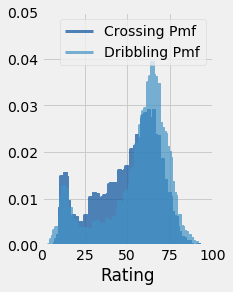

<Figure size 576x432 with 0 Axes>

In [43]:
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([crossing_pmf, dribbling_pmf])
thinkplot.Show(xlabel='Rating', axis=axis)


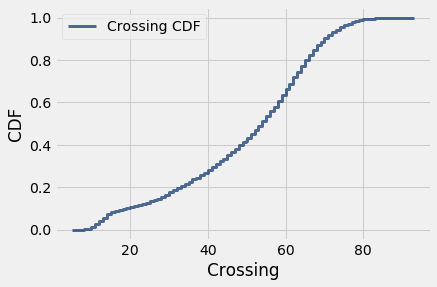

In [44]:
cdf = thinkstats2.Cdf(data.Crossing, label='Crossing CDF')

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Crossing', ylabel='CDF', loc='upper left')

In [46]:
cdf.Prob(40),cdf.Prob(80)
#this means that 28 percent of the players have rating of 40 and 99 percent have rating of 80

(0.28280331740539355, 0.9913220190036799)

In [47]:
cdf.Value(.5)
# This means that 50 percent have rating of 54
cdf.Prob(54)
# this shows that.

0.5113967155489647

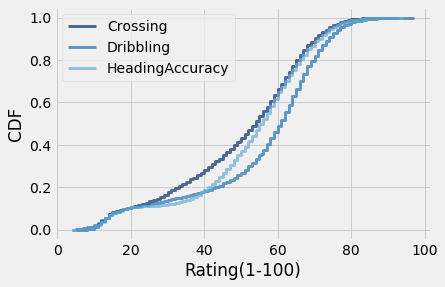

In [50]:
crossing_cdf = thinkstats2.Cdf(data.Crossing, label='Crossing')
dribbling_cdf = thinkstats2.Cdf(data.Dribbling, label='Dribbling')
headingaccuracy_cdf = thinkstats2.Cdf(data.HeadingAccuracy, label='HeadingAccuracy')

thinkplot.PrePlot(3)
thinkplot.Cdfs([crossing_cdf, dribbling_cdf,headingaccuracy_cdf])
thinkplot.Config(xlabel='Rating(1-100)', ylabel='CDF')

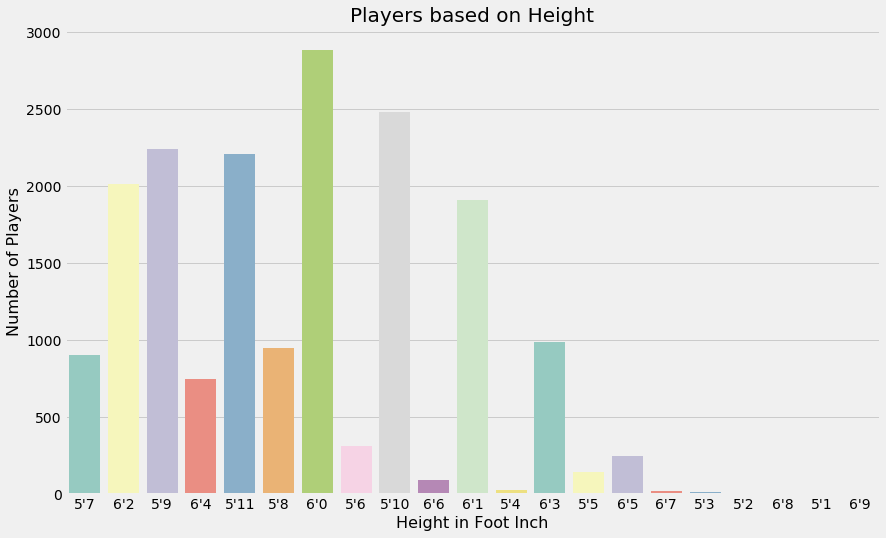

In [49]:
# Height of Players

plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = data, palette = 'Set3',orient="v")
ax.set_title(label = 'Players based on Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot Inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
plt.show()

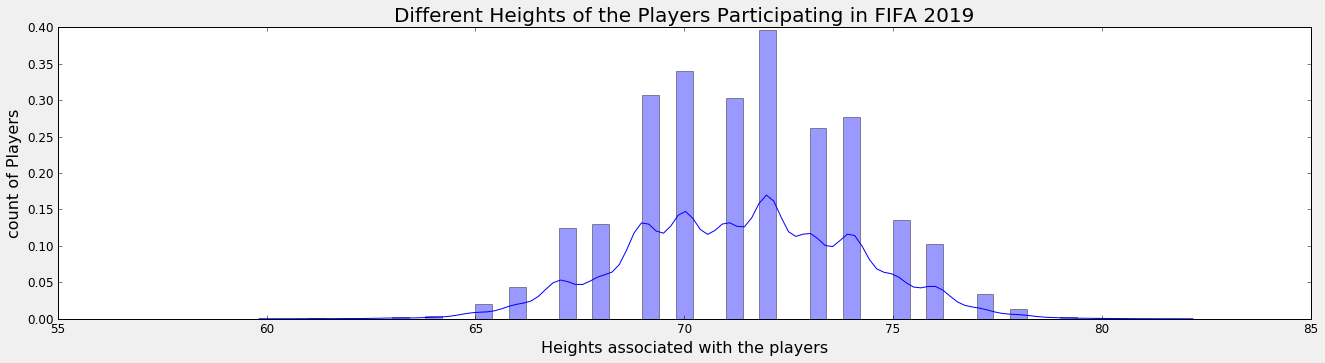

In [51]:
plt.figure(figsize = (20, 5))
plt.style.use('_classic_test')
sns.distplot(data['Height_Inch'], color = 'blue')
plt.title('Different Heights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

In [52]:
# Normal distribution in above graph shows to be 71.36 as shown here

statistics.mean(data['Height_Inch'])

71.3612533729831

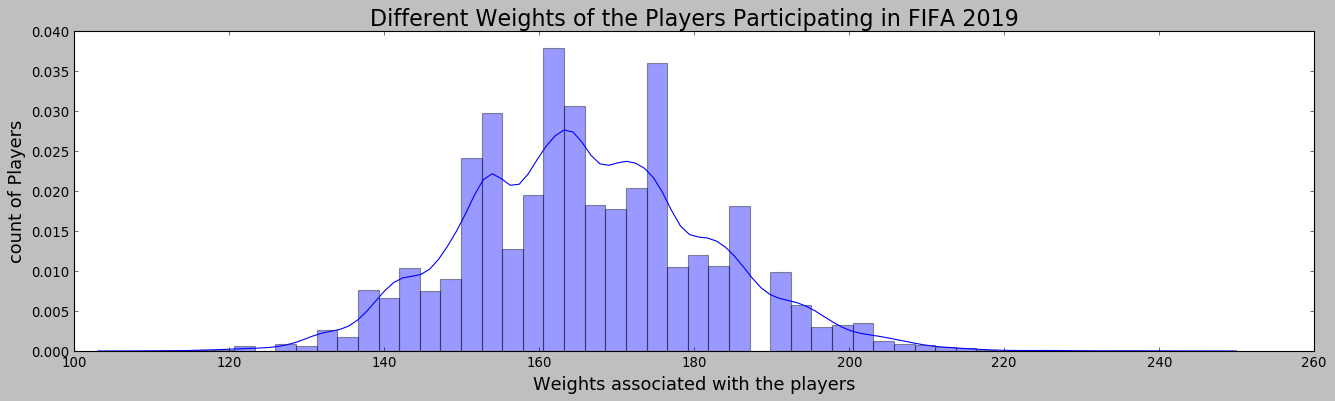

In [54]:
plt.figure(figsize = (20, 5))
plt.style.use('_classic_test')
sns.distplot(data['Weight'], color = 'blue')
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Weights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

In [440]:
statistics.mean(data['Weight'])

165.97912880665234

In [258]:
youth = data.query('Age <= 18')
adult = data.query('18 < Age <= 30')
veteran = data.query('Age > 30')

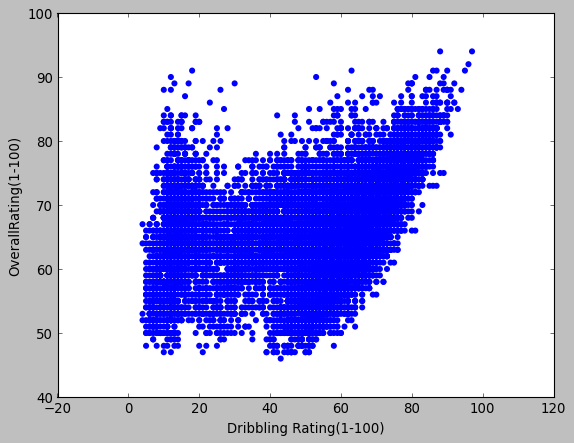

In [57]:
thinkplot.Scatter(data['Dribbling'], data['Overall'], alpha=1)
thinkplot.Config(xlabel='Dribbling Rating(1-100)',
                 ylabel='OverallRating(1-100)',
                 legend=False)

In [516]:
import statsmodels.formula.api as smf

formula = 'Overall ~ Crossing+Finishing+HeadingAccuracy+ShortPassing+Volleys+Dribbling+Curve+FKAccuracy+LongPassing+BallControl+Acceleration+SprintSpeed+Agility+Reactions+Balance+ShotPower+Jumping+Stamina+Strength+LongShots+Aggression+Interceptions+Positioning+Vision+Penalties+Composure+Marking+StandingTackle+SlidingTackle+GKDiving+GKHandling+GKKicking+GKPositioning+GKReflexes'
model = smf.ols(formula, data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     3218.
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        07:57:52   Log-Likelihood:                -43283.
No. Observations:               18207   AIC:                         8.664e+04
Df Residuals:                   18172   BIC:                         8.691e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.0381      0.265     37.887      0.000       9.519      10.557
Crossing            0.0142      0.003      5.454      0.000       0.009       0.019
Finishing           0.0277      0.003      8.437      0.000       0.021       0.034
HeadingAccuracy     0.0896      0.003     32.577      0.000       0.084       0.095
ShortPassing        0.0825      0.005     17.681      0.000       0.073       0.092
Volleys             0.0006      0.003      0.200      0.842      -0.005       0.006
Dribbling           0.0202      0.004      4.945      0.000       0.012       0.028
Curve               0.0104      0.003      3.710      0.000       0.005       0.016
FKAccuracy          0.0056      0.002      2.273      0.023       0.001       0.010
LongPassing        -0.0183      0.003     -5.345      0.000      -0.025      -0.012
BallControl         0.1474      0.005     29.413      0.000       0.138       0.157
Acceleration        0.0358      0.004      9.242      0.000       0.028       0.043
SprintSpeed         0.0254      0.004      7.070      0.000       0.018       0.032
Agility             0.0011      0.003      0.399      0.690      -0.004       0.007
Reactions           0.2924      0.004     77.175      0.000       0.285       0.300
Balance            -0.0225      0.003     -8.686      0.000      -0.028      -0.017
ShotPower           0.0240      0.003      8.237      0.000       0.018       0.030
Jumping             0.0050      0.002      2.455      0.014       0.001       0.009
Stamina             0.0123      0.002      5.235      0.000       0.008       0.017
Strength            0.0355      0.002     14.539      0.000       0.031       0.040
LongShots          -0.0216      0.003     -6.988      0.000      -0.028      -0.016
Aggression         -0.0007      0.002     -0.325      0.745      -0.005       0.004
Interceptions      -0.0056      0.003     -1.798      0.072      -0.012       0.001
Positioning        -0.0544      0.003    -17.799      0.000      -0.060      -0.048
Vision             -0.0142      0.003     -5.021      0.000      -0.020      -0.009
Penalties           0.0019      0.003      0.702      0.483      -0.003       0.007
Composure           0.1195      0.003     39.178      0.000       0.113       0.125
Marking             0.0360      0.003     14.370      0.000       0.031       0.041
StandingTackle      0.0268      0.005      5.724      0.000       0.018       0.036
SlidingTackle      -0.0200      0.004     -4.619      0.000      -0.029      -0.012
GKDiving            0.0728      0.006     12.456      0.000       0.061       0.084
GKHandling          0.0744      0.006     12.587      0.000       0.063       0.086
GKKicking           0.0339      0.005      6.222      0.000       0.023       0.045
GKPositioning       0.0700      0.006     12.116      0.000

In [520]:
# Remove features with negative coefficient
import statsmodels.formula.api as smf

formula = 'Overall ~ Crossing+Finishing+HeadingAccuracy+ShortPassing+Volleys+Dribbling+Curve+FKAccuracy+BallControl+Acceleration+SprintSpeed+Agility+Reactions+ShotPower+Jumping+Stamina+Strength+Penalties+Composure+Marking+StandingTackle+GKDiving+GKHandling+GKKicking+GKPositioning+GKReflexes'
model = smf.ols(formula, data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     4048.
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:04:19   Log-Likelihood:                -43589.
No. Observations:               18207   AIC:                         8.723e+04
Df Residuals:                   18180   BIC:                         8.744e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.5828      0.238     40.259      0.000       9.116      10.049
Crossing            0.0031      0.003      1.194      0.232      -0.002       0.008
Finishing           0.0004      0.003      0.138      0.890      -0.005       0.006
HeadingAccuracy     0.0969      0.003     36.017      0.000       0.092       0.102
ShortPassing        0.0623      0.004     16.256      0.000       0.055       0.070
Volleys            -0.0051      0.003     -1.789      0.074      -0.011       0.000
Dribbling          -0.0013      0.004     -0.324      0.746      -0.009       0.007
Curve               0.0063      0.003      2.224      0.026       0.001       0.012
FKAccuracy          0.0005      0.002      0.223      0.824      -0.004       0.005
BallControl         0.1459      0.005     28.653      0.000       0.136       0.156
Acceleration        0.0325      0.004      8.332      0.000       0.025       0.040
SprintSpeed         0.0314      0.004      8.624      0.000       0.024       0.038
Agility            -0.0086      0.003     -3.073      0.002      -0.014      -0.003
Reactions           0.2833      0.004     75.435      0.000       0.276       0.291
ShotPower           0.0146      0.003      5.468      0.000       0.009       0.020
Jumping             0.0012      0.002      0.594      0.552      -0.003       0.005
Stamina             0.0030      0.002      1.278      0.201      -0.002       0.008
Strength            0.0434      0.002     19.147      0.000       0.039       0.048
Penalties           0.0008      0.003      0.297      0.767      -0.005       0.006
Composure           0.1164      0.003     38.078      0.000       0.110       0.122
Marking             0.0343      0.002     13.851      0.000       0.029       0.039
StandingTackle      0.0055      0.002      2.202      0.028       0.001       0.010
GKDiving            0.0744      0.006     12.536      0.000       0.063       0.086
GKHandling          0.0768      0.006     12.790      0.000       0.065       0.089
GKKicking           0.0334      0.006      6.035      0.000       0.023       0.044
GKPositioning       0.0682      0.006     11.628      0.000       0.057       0.080
GKReflexes          0.0773      0.006     13.128      0.000       0.066       0.089
==============================================================================
Omnibus:                       44.610   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.829
Skew:                           0.027   Prob(JB):                     7.53e-13
Kurtosis:                       3.266   Cond. No.                     3.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [521]:
# Remove features with negative coefficient
import statsmodels.formula.api as smf

formula = 'Overall ~ Crossing+Finishing+HeadingAccuracy+ShortPassing+Curve+FKAccuracy+BallControl+Acceleration+SprintSpeed+Reactions+ShotPower+Jumping+Stamina+Strength+Penalties+Composure+Marking+StandingTackle+GKDiving+GKHandling+GKKicking+GKPositioning+GKReflexes'
model = smf.ols(formula, data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     4573.
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:06:27   Log-Likelihood:                -43596.
No. Observations:               18207   AIC:                         8.724e+04
Df Residuals:                   18183   BIC:                         8.743e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.4702      0.234     40.539      0.000       9.012       9.928
Crossing            0.0024      0.003      0.945      0.345      -0.003       0.007
Finishing          -0.0019      0.003     -0.706      0.480      -0.007       0.003
HeadingAccuracy     0.0981      0.003     37.281      0.000       0.093       0.103
ShortPassing        0.0620      0.004     16.181      0.000       0.055       0.070
Curve               0.0048      0.003      1.715      0.086      -0.001       0.010
FKAccuracy          0.0001      0.002      0.051      0.960      -0.005       0.005
BallControl         0.1434      0.004     31.966      0.000       0.135       0.152
Acceleration        0.0292      0.004      7.771      0.000       0.022       0.037
SprintSpeed         0.0306      0.004      8.442      0.000       0.023       0.038
Reactions           0.2824      0.004     75.374      0.000       0.275       0.290
ShotPower           0.0141      0.003      5.345      0.000       0.009       0.019
Jumping            -0.0001      0.002     -0.056      0.955      -0.004       0.004
Stamina             0.0023      0.002      0.984      0.325      -0.002       0.007
Strength            0.0450      0.002     20.304      0.000       0.041       0.049
Penalties           0.0003      0.003      0.124      0.902      -0.005       0.006
Composure           0.1154      0.003     37.927      0.000       0.109       0.121
Marking             0.0346      0.002     13.967      0.000       0.030       0.039
StandingTackle      0.0063      0.002      2.533      0.011       0.001       0.011
GKDiving            0.0744      0.006     12.540      0.000       0.063       0.086
GKHandling          0.0770      0.006     12.832      0.000       0.065       0.089
GKKicking           0.0337      0.006      6.085      0.000       0.023       0.045
GKPositioning       0.0683      0.006     11.633      0.000       0.057       0.080
GKReflexes          0.0775      0.006     13.162      0.000       0.066       0.089
==============================================================================
Omnibus:                       45.524   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.150
Skew:                           0.027   Prob(JB):                     3.89e-13
Kurtosis:                       3.269   Cond. No.                     2.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
Model_Independent_Variables = data[skills]
Model_Dependent_Variable = data.Overall

In [89]:
Model_Independent_Variables

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [90]:
Model_Dependent_Variable

0        94
1        94
2        92
3        91
4        91
         ..
18202    47
18203    47
18204    47
18205    47
18206    46
Name: Overall, Length: 18207, dtype: int64

In [91]:
#Split dataset into test and train datasets
from sklearn.model_selection import train_test_split
# Create test and train data set. Training data set is 80% of the total and test is 20%
X_train, X_test, y_train, y_test = train_test_split(Model_Independent_Variables, Model_Dependent_Variable, test_size=0.2,random_state = 0)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3642, 34) (14565, 34)
(3642,) (14565,)


In [92]:
#Apply Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.8514783362139567
RMSE : 2.6485407085072126


In [93]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [94]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [96]:
inter, slope = LeastSquares(predictions, y_test)
inter,slope

(0.16948691508001446, 0.9971888439428312)

In [97]:
fit_xs, fit_ys = FitLine(predictions, inter, slope)

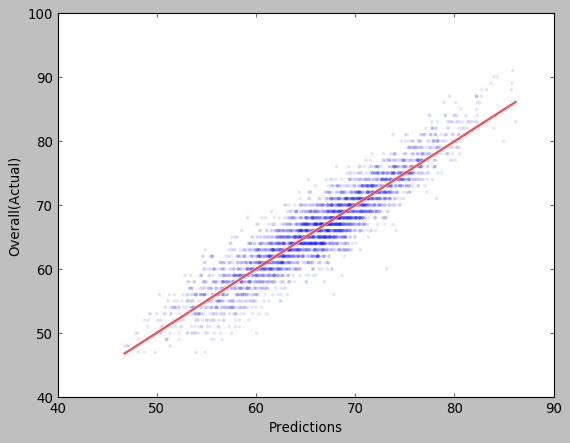

In [98]:
thinkplot.Scatter(predictions, y_test, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Predictions",
                 ylabel='Overall(Actual)',
                 legend=False)

In [105]:
# reduce features
Model_Independent_Variables = data[["Crossing","Finishing","HeadingAccuracy","ShortPassing","Volleys","Dribbling","Curve","LongPassing","BallControl","Acceleration","Agility","Stamina","Strength",]]

In [106]:
#Split dataset into test and train datasets
from sklearn.model_selection import train_test_split
# Create test and train data set. Training data set is 80% of the total and test is 20%
X_train, X_test, y_train, y_test = train_test_split(Model_Independent_Variables, Model_Dependent_Variable, test_size=0.2,random_state = 0)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3642, 13) (14565, 13)
(3642,) (14565,)


In [107]:
#Apply Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.40904612184323474
RMSE : 5.283096496301383


In [108]:
inter, slope = LeastSquares(predictions, y_test)
inter,slope

(-1.1423557380204983, 1.0164462486903685)

In [109]:
fit_xs, fit_ys = FitLine(predictions, inter, slope)

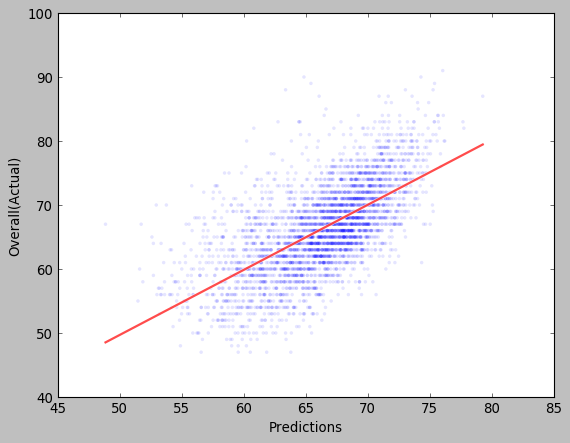

In [110]:
thinkplot.Scatter(predictions, y_test, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Predictions",
                 ylabel='Overall(Actual)',
                 legend=False)